### CDM을 활용한 COPD 환자들의 폐암 예측 및 요인 분석

#### 시나리오

1. 폐암 발생 여부를 예측하는 classification model 구현 (목표 정확도 85% 이상)
2. 코호트군(폐암O)과 대조군(폐암X)에서 환자 기본정보, 치료, 약, 동반질환 여부, 검사결과 등을 분석했을 경우 유의한 차이가 있는지 분석<br>
    2-1. 차이가 있다면, 어떤 부분에서 차이가 있는지 세부 분석<br>
    2-2. 차이가 없다면, classification model에서 연구 중단
3. 코호트군과 대조군의 데이터 분포 비교를 통해 COPD 환자가 폐암에 걸릴 가능성을 낮출 수 있는 방안을 제시한다. <br>즉, 코호트군과 달리 대조군에서만 보이는 데이터의 특성을 기반으로 사용 약물/치료법을 추천한다.
4. 단, 본 연구는 의학적 관점이 아닌 데이터 관점에서 연구를 진행했다는 한계/제한이 있다. <br><br>

#### 데이터 추출 조건  

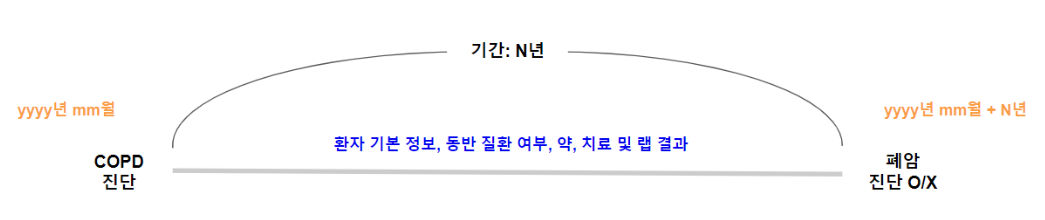

**[데이터셋 A, B 정의]**

**[데이터 추출 방법]**

<방법1>

OMOP CDM을 통해 데이터 추출 [CDM v5.3.1](https://ohdsi.github.io/CommonDataModel/cdm53.html#Clinical_Data_Tables)

1. Person, Condition, Observation, Concept 등 OMOP CDM 테이블을 사용하여 필요한 데이터를 쿼리
2. COPD를 진단받은 환자 식별을 위해 Condition 테이블에서 COPD 관련 용어(concept_id)를 사용하여 COPD 진단을 포함하는 환자 찾기

* 데이터셋 A 추출: Condition 테이블에서 lung cancer 관련 용어를 사용하여 lung cancer 진단을 포함하는 환자 찾기
* 데이터셋 B 추출: Condition 테이블에서 lung cancer 진단을 포함하지 않는 환자 찾기

3. 데이터셋 A와 B에 필요한 추가 정보를 포함할 수 있도록 다른 테이블의 데이터를 조합
    - Measurement 테이블: 폐기능 검사 결과, 종양 마커 검사 결과 등과 같은 측정값 데이터를 포함 가능
    
    - Drug_Exposure 테이블: 환자가 사용한 약물 정보
    
    - Procedure_occurrence 테이블: 수술 및 기타 의료 절차 정보
    
    - Visit_occurrence 테이블: 환자의 의료 방문 정보
    
    - Death 테이블: 환자의 사망 정보 (COPD~암 까지의 기간 내에는 불필요하지만 meta 분석 용으로는 사용 가능)

4. 데이터셋 A와 B를 저장하거나 분석에 사용할 형식으로 변환 (.csv)<br><br>

<방법2>

CRDW를 이용한 데이터 추출

* CRDW(Clinical Research Data Warehouse, 임상연구데이터웨어하우스)
* 고대안암, 고대구로, 보라매병원, 가천대길병원, 전북대병원, 건양대병원의 데이터를 공통 포맷으로 모아둔 DB

**데이터 추출 조건 정의**<br><br>


[데이터셋A: 환자군]<br>
2010년부터 2015년 사이에 최소 한번은 COPD를 진단받은 환자 중 COPD를 진단받은 가장 이른 날짜에 lung cancer 진단이 없으면서도 COPD 진단 후 5년 이내에 lung cancer 진단을 받은 환자의 모든 테이블

* CL_INTE_CLNC_KCD(통합진단명기록) 테이블에서 MDCR_YMD(진료일자)가 2010년 1월 1일부터 2015년 12월 31일 사이에
* CL_INTE_CLNC_KCD(통합진단명기록) 테이블에서 SCIN_CD(상병코드)가 'J44' 또는 'J440' 또는 'J441' 또는 'J448' 또는 'J449'로 진단받은 환자 중
* COPD 진단 당시의 날짜 MDCR_YMD(진료일자)에는 SCIN_CD(상병코드)로  'C34' 또는 'C340' 또는 'C341' 또는 'C342' 또는 'C342' 또는 'C343' 또는 'C348' 또는 'C349'가 없지만,  
* COPD 진단을 받은 MDCR_YMD(진료일자) 이후 5년 이내에 SCIN_CD(상병코드)로 'C34' 또는 'C340' 또는 'C341' 또는 'C342' 또는 'C342' 또는 'C343' 또는 'C348' 또는 'C349'를 진단받은 환자

[데이터셋B: 대조군]<br>
2010년부터 2015년 사이에 최소 한번은 COPD를 진단받은 환자 중 COPD 진단일자 이후부터 5년간 lung cancer를 진단받지 않은 환자의 모든 테이블

* CL_INTE_CLNC_KCD(통합진단명기록) 테이블에서 MDCR_YMD(진료일자)가 2010년 1월 1일부터 2015년 12월 31일 사이에
* CL_INTE_CLNC_KCD(통합진단명기록) 테이블에서 SCIN_CD(상병코드)가 'J44' 또는 'J440' 또는 'J441' 또는 'J448' 또는 'J449'로 진단받은 환자 중
* COPD 진단을 받은 MDCR_YMD(진료일자) 이후 5년동안 SCIN_CD(상병코드)로 'C34' 또는 'C340' 또는 'C341' 또는 'C342' 또는 'C342' 또는 'C343' 또는 'C348' 또는 'C349'를 진단받은 적이 없는 환자

**한국표준질병사인분류 참고** [KOICD](https://www.koicd.kr/kcd/kcd.do#)

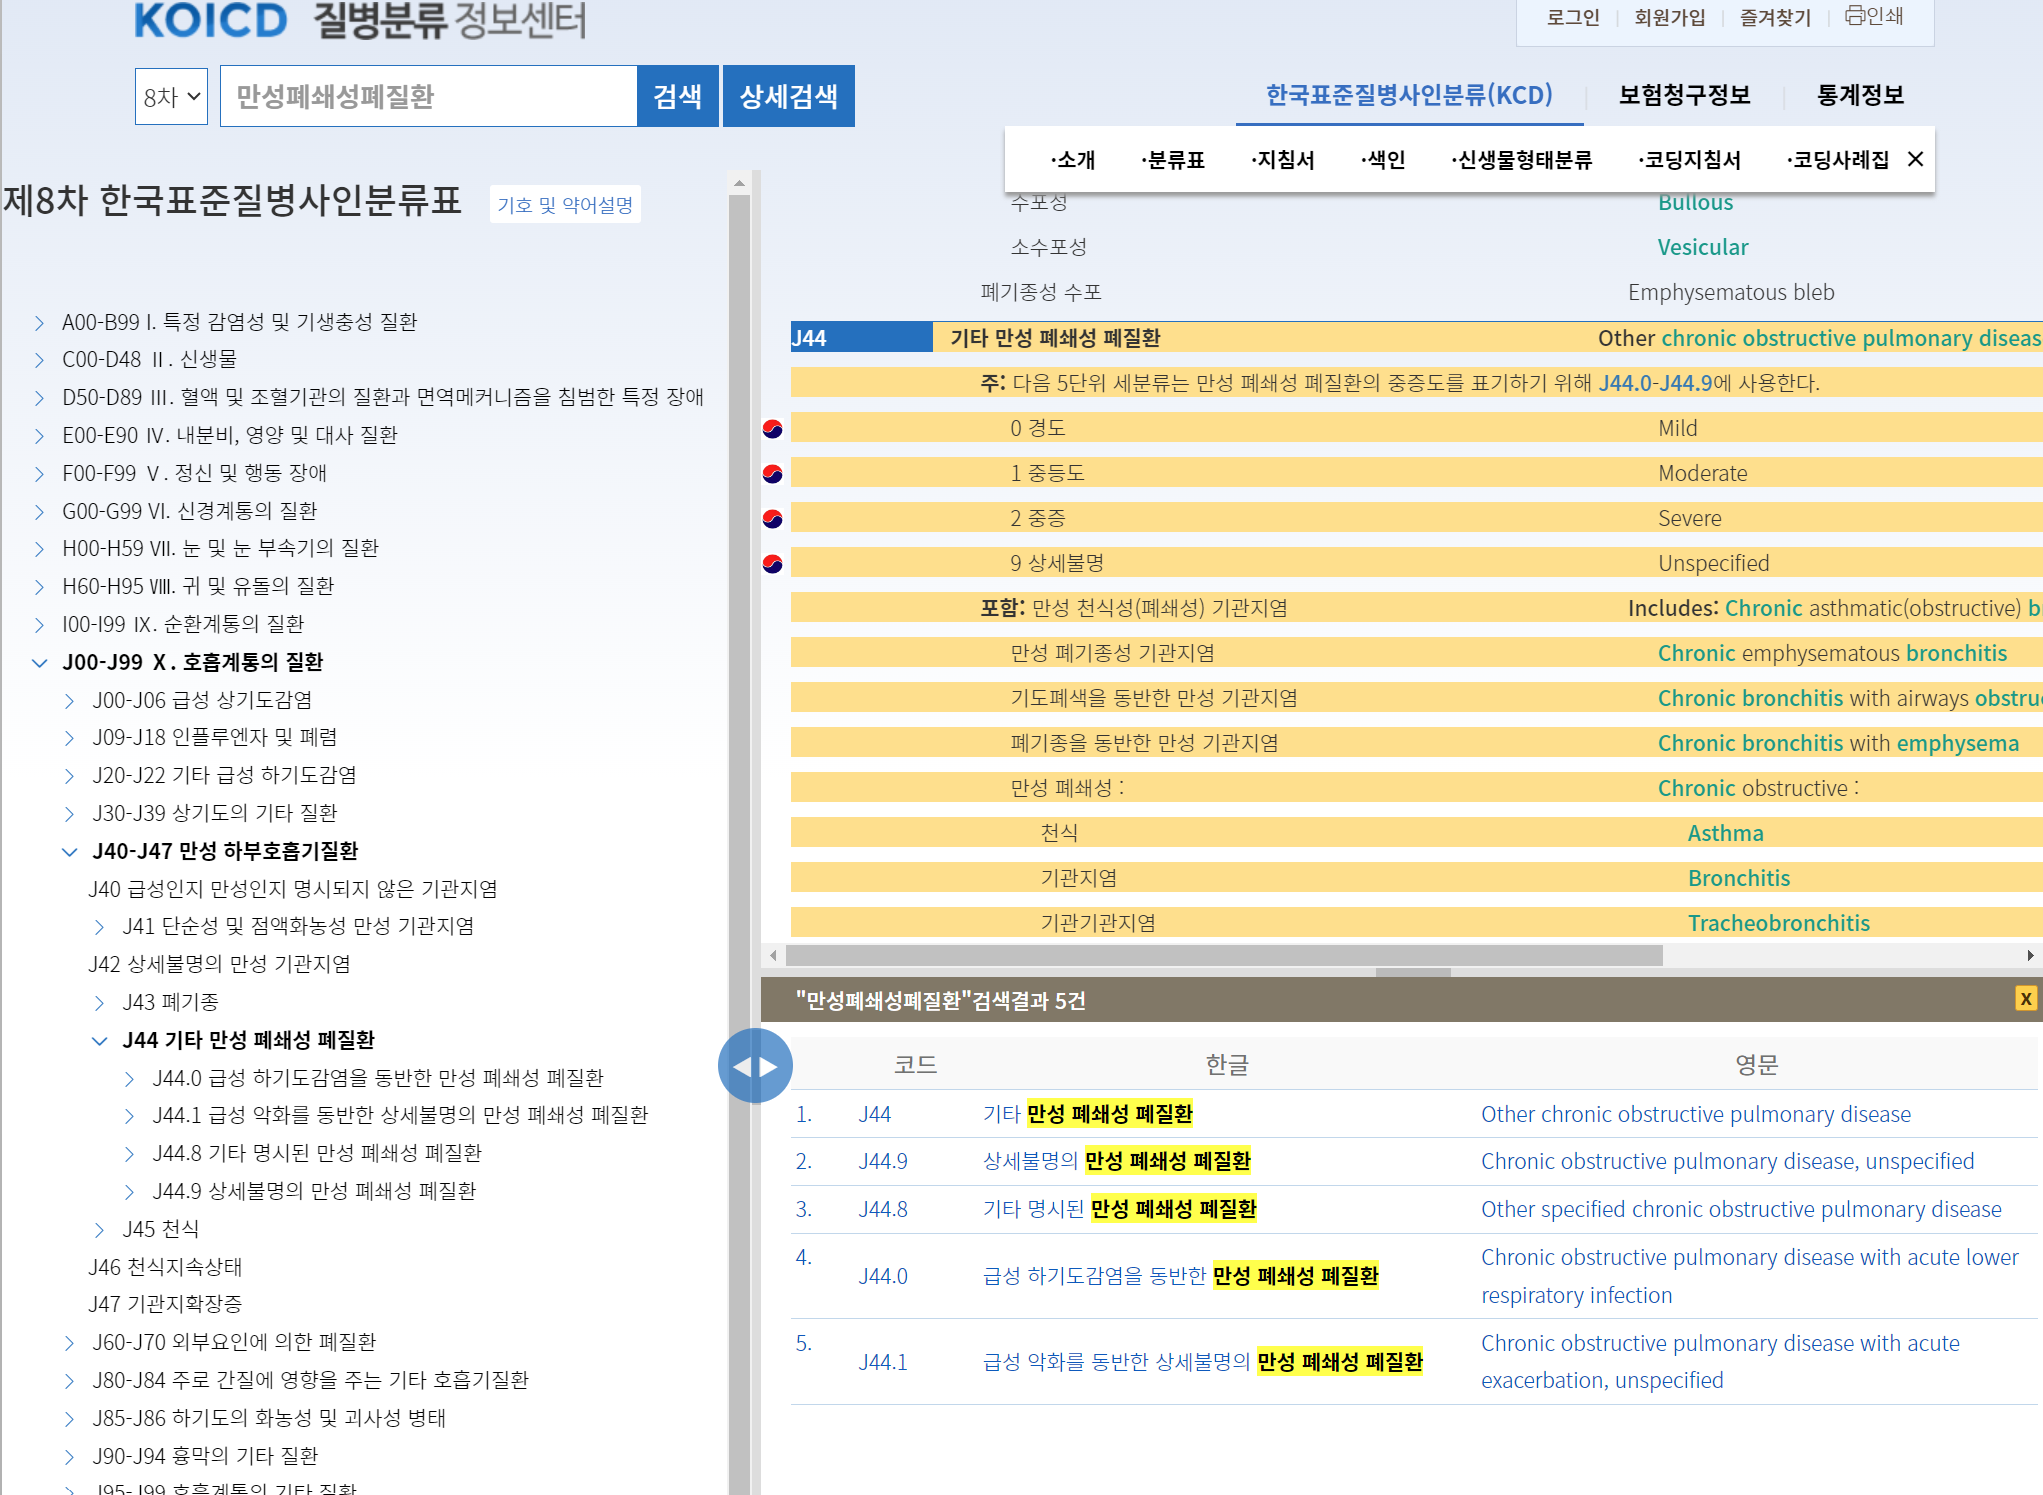

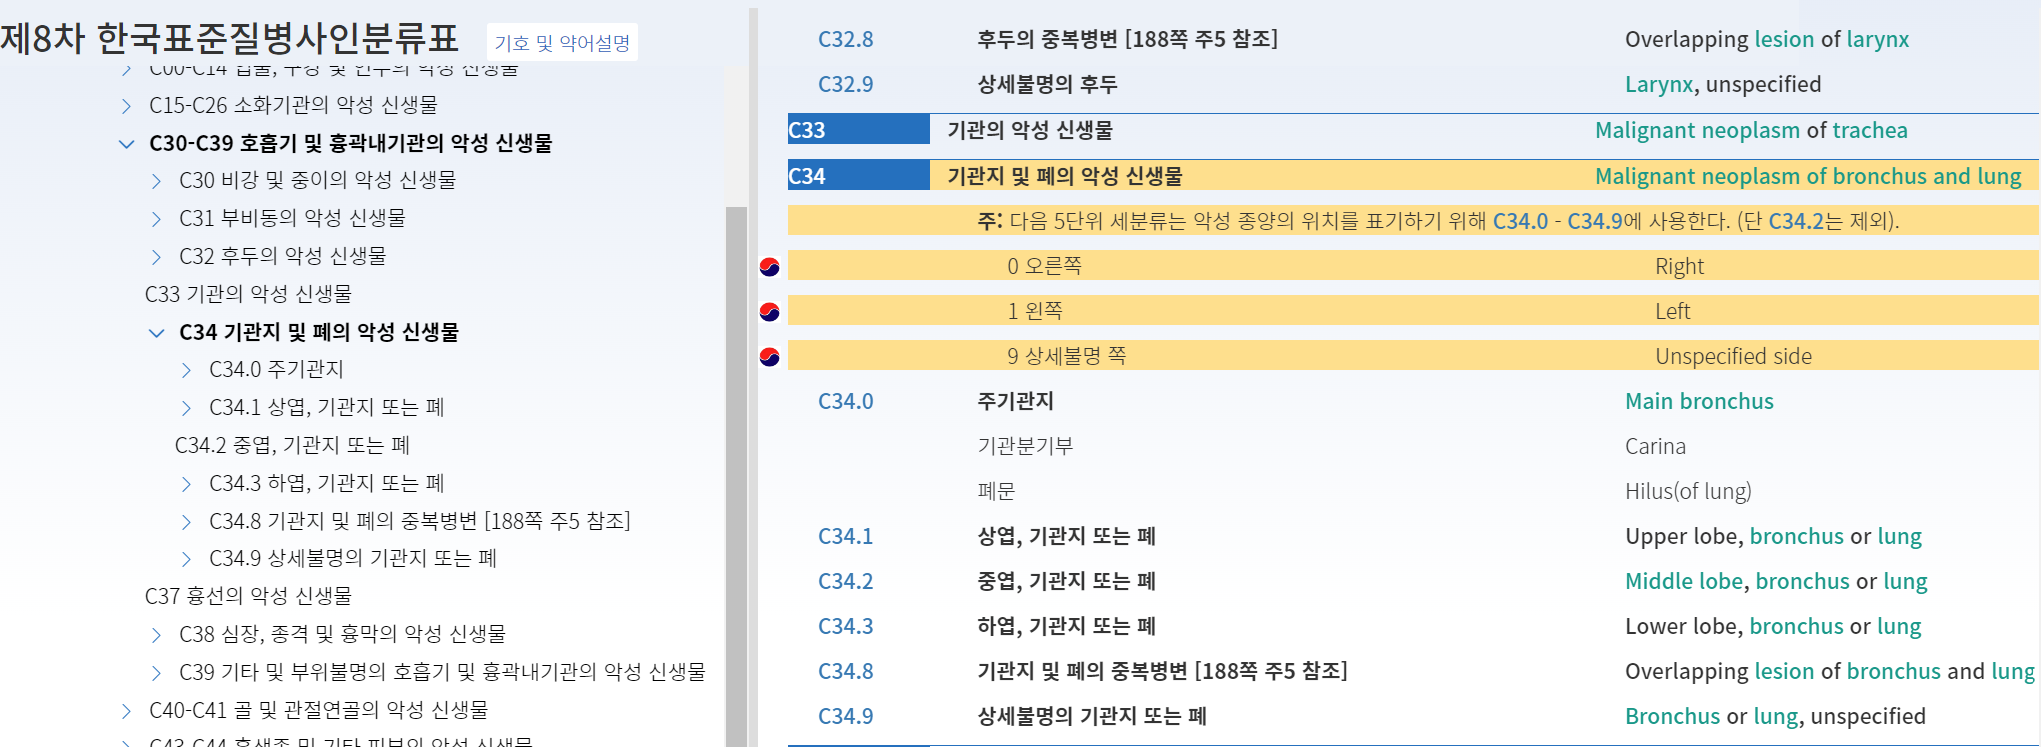